# Data Cleaning and Exploratory Data Analysis (EDA) on the Titanic Dataset from Kaggle.
Exploring the relationships between variables and identifying patterns and trends in the data.

This serves as the 2nd task of Data Science Internship in Prodigy Infotech
# Prodigy_DS_02

<h1 style="color:orange;"> Steps Involved in EDA (Exploratory Data Analysis)</h1>

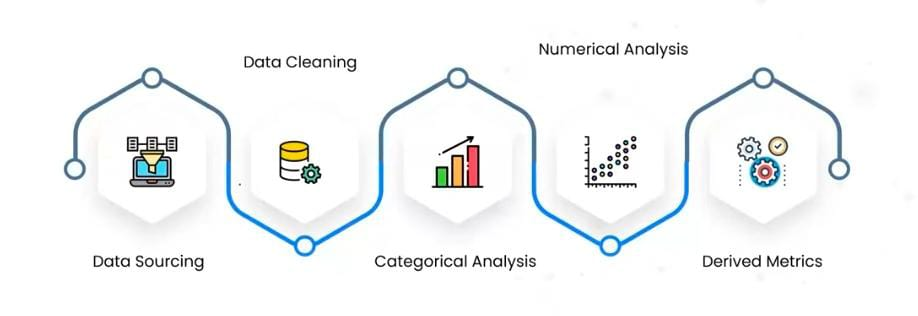

In [1]:
#for reading dataset importing Pandas
#for using Pandas importing Numpy

import pandas as pd
import numpy as np

<h1 style="color:orange;"> Data Sourcing, Reading and Framing</h1>

exploring and knowing the features of data

In [2]:
data=pd.read_csv('TitanicDataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape
#tells about (rows, columns) of the data

(891, 12)

In [5]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<h1 style="color:orange;"> Data Cleaning</h1> 
<h3 style="color:teal;">Missing Value Treatment</h3>
Searching for null values and filling missing values using fillna(), replace() and interpolate().
In fillna(), there are 4 ways - single value, pad, bfill, customized value based on columns

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#showing all data with null values in Age column

bool_series = pd.isnull(data["Age"])
data[bool_series]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [10]:
data['Age'].mean()

29.69911764705882

In [11]:
filleddata=data
filleddata['Age']=filleddata['Age'].fillna(data['Age'].mean())
filleddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
filleddata["Cabin"]=filleddata["Cabin"].replace(to_replace=np.nan, value='Not in Cabin')

In [13]:
filleddata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not in Cabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not in Cabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not in Cabin,S


In [14]:
bool_series = pd.isnull(filleddata["Embarked"])
data[bool_series]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [15]:
filleddata.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Not in Cabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Not in Cabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Not in Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Not in Cabin,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Not in Cabin,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


<h1 style="color:orange;"> Exploratory Data Analysis</h1>

In [16]:
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
vdata=filleddata

<h1 style="color:navy;">Univariate Analysis</h1>
<h1 style="color:fuchsia;"> Categorical Analysis</h1>

In [18]:
vdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not in Cabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not in Cabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not in Cabin,S


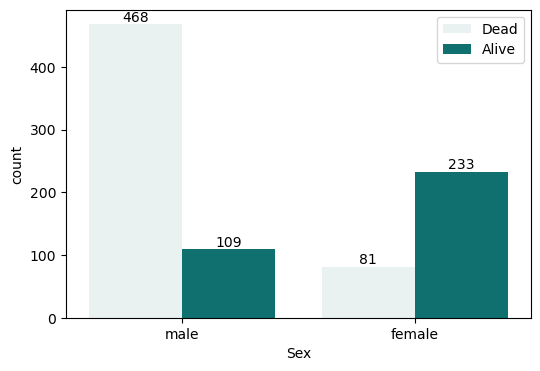

In [19]:
vdata.drop(columns=['Survived'])
plt.figure(figsize=(6,4))
ax1=sns.countplot(data=vdata, x="Sex", hue='Survived', color="teal")
plt.legend(labels = ['Dead', 'Alive'])
for i in ax1.containers:
    ax1.bar_label(i,)
plt.show()

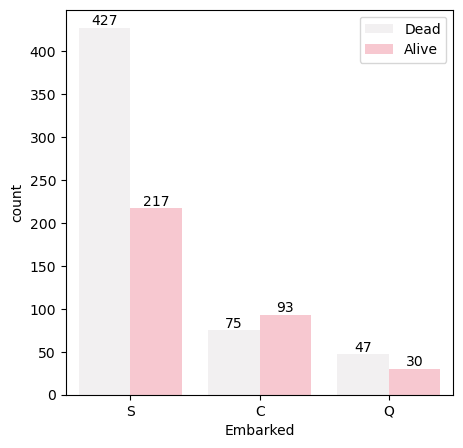

In [20]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=vdata, x="Embarked", hue='Survived', color="pink")
plt.legend(labels = ['Dead', 'Alive'])
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

#names of embarking ports - C = Cherbourg, Q = Queenstown, S = Southampton

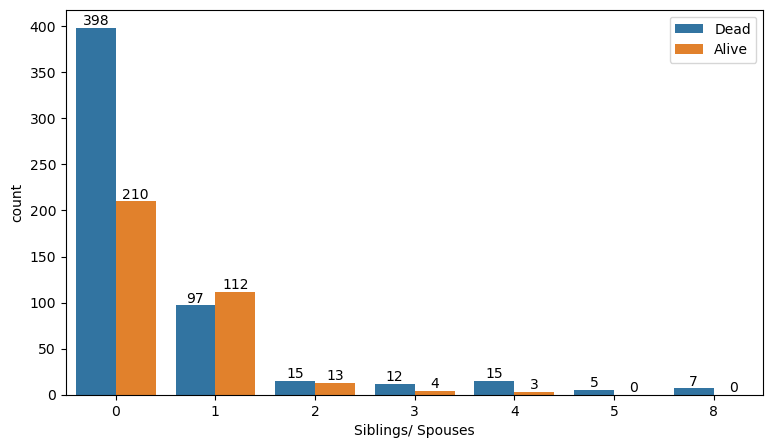

In [21]:
plt.figure(figsize=(9,5))
ax=sns.countplot(data=vdata, x="SibSp", hue='Survived')
plt.legend(labels = ['Dead', 'Alive'])
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("Siblings/ Spouses")
plt.show()

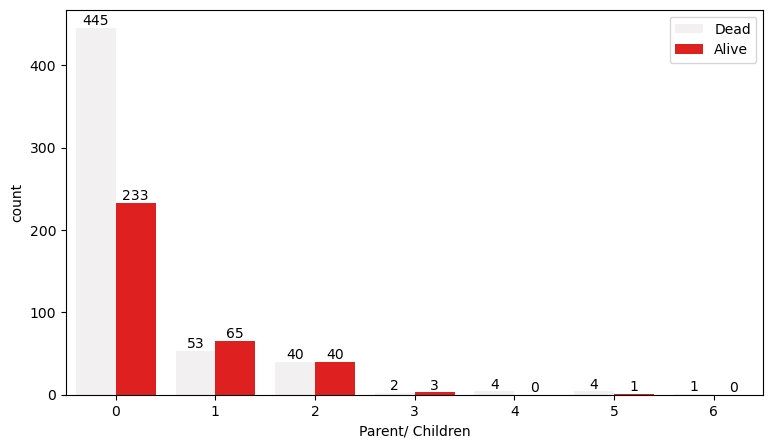

In [22]:
plt.figure(figsize=(9,5))
ax=sns.countplot(data=vdata, x="Parch", hue='Survived', color='red')
plt.legend(labels = ['Dead', 'Alive'])
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("Parent/ Children")
plt.show()

<h1 style="color:navy;">Bivariate Analysis</h1>

<h2 style='color:fuchsia;'>Categorical v/s Numerical</h2>

<Axes: xlabel='Age', ylabel='Survived'>

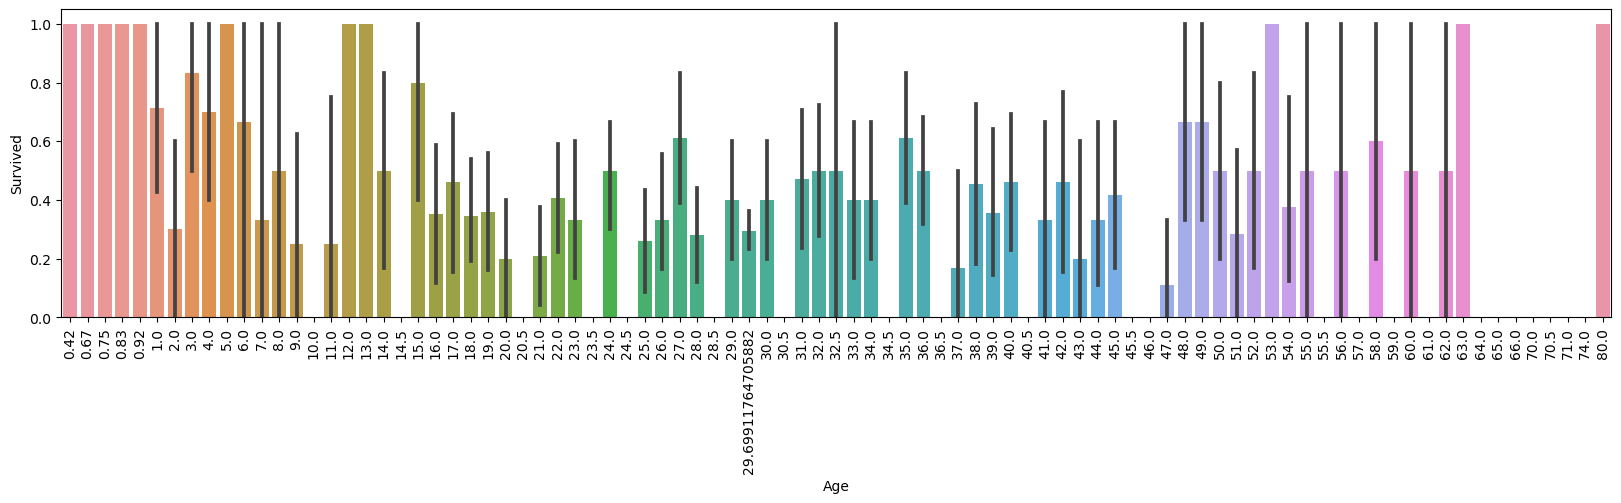

In [23]:
plt.figure(figsize=(20, 4)) 
plt.xticks(rotation=90) 
sns.barplot(x=vdata['Age'], y=vdata['Survived']) 

<h2 style='color:fuchsia;'>Numerical V/s Numerical</h2>

<Axes: xlabel='Fare', ylabel='Age'>

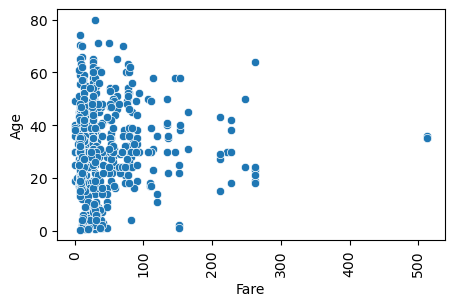

In [24]:
plt.figure(figsize=(5, 3)) 
plt.xticks(rotation=90) 
sns.scatterplot(x=vdata['Fare'], y=vdata['Age']) 

## <h2 style='color:fuchsia;'>Categorical V/s Categorical data</h2>

C:\Users\quadi\AppData\Local\Temp\ipykernel_23044\1328739753.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(vdata.Pclass[(vdata["Survived"]==0)], color='Red',shade=True)
C:\Users\quadi\AppData\Local\Temp\ipykernel_23044\1328739753.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(vdata.Pclass[(vdata["Survived"]==1)], color='Blue',shade=True)


Text(0.5, 1.0, 'Pclass by Survival')

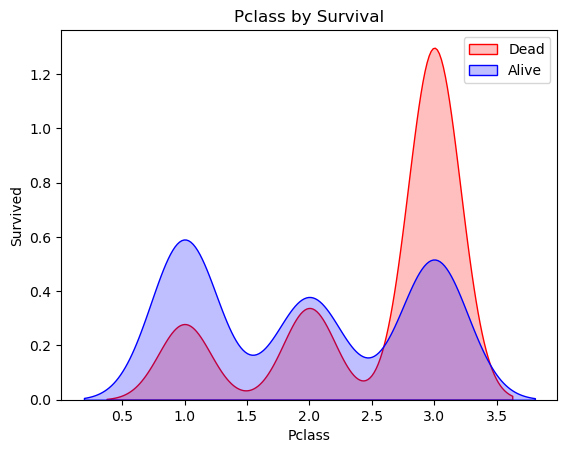

In [25]:
#sns.countplot(x=vdata['Pclass'], hue=data['Survived']) 

Tot = sns.kdeplot(vdata.Pclass[(vdata["Survived"]==0)], color='Red',shade=True)
Tot = sns.kdeplot(vdata.Pclass[(vdata["Survived"]==1)], color='Blue',shade=True)
Tot.legend(["Dead", "Alive"], loc='upper right')
Tot.set_ylabel('Survived')
Tot.set_xlabel('Pclass')
Tot.set_title('Pclass by Survival')

C:\Users\quadi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x300 with 0 Axes>

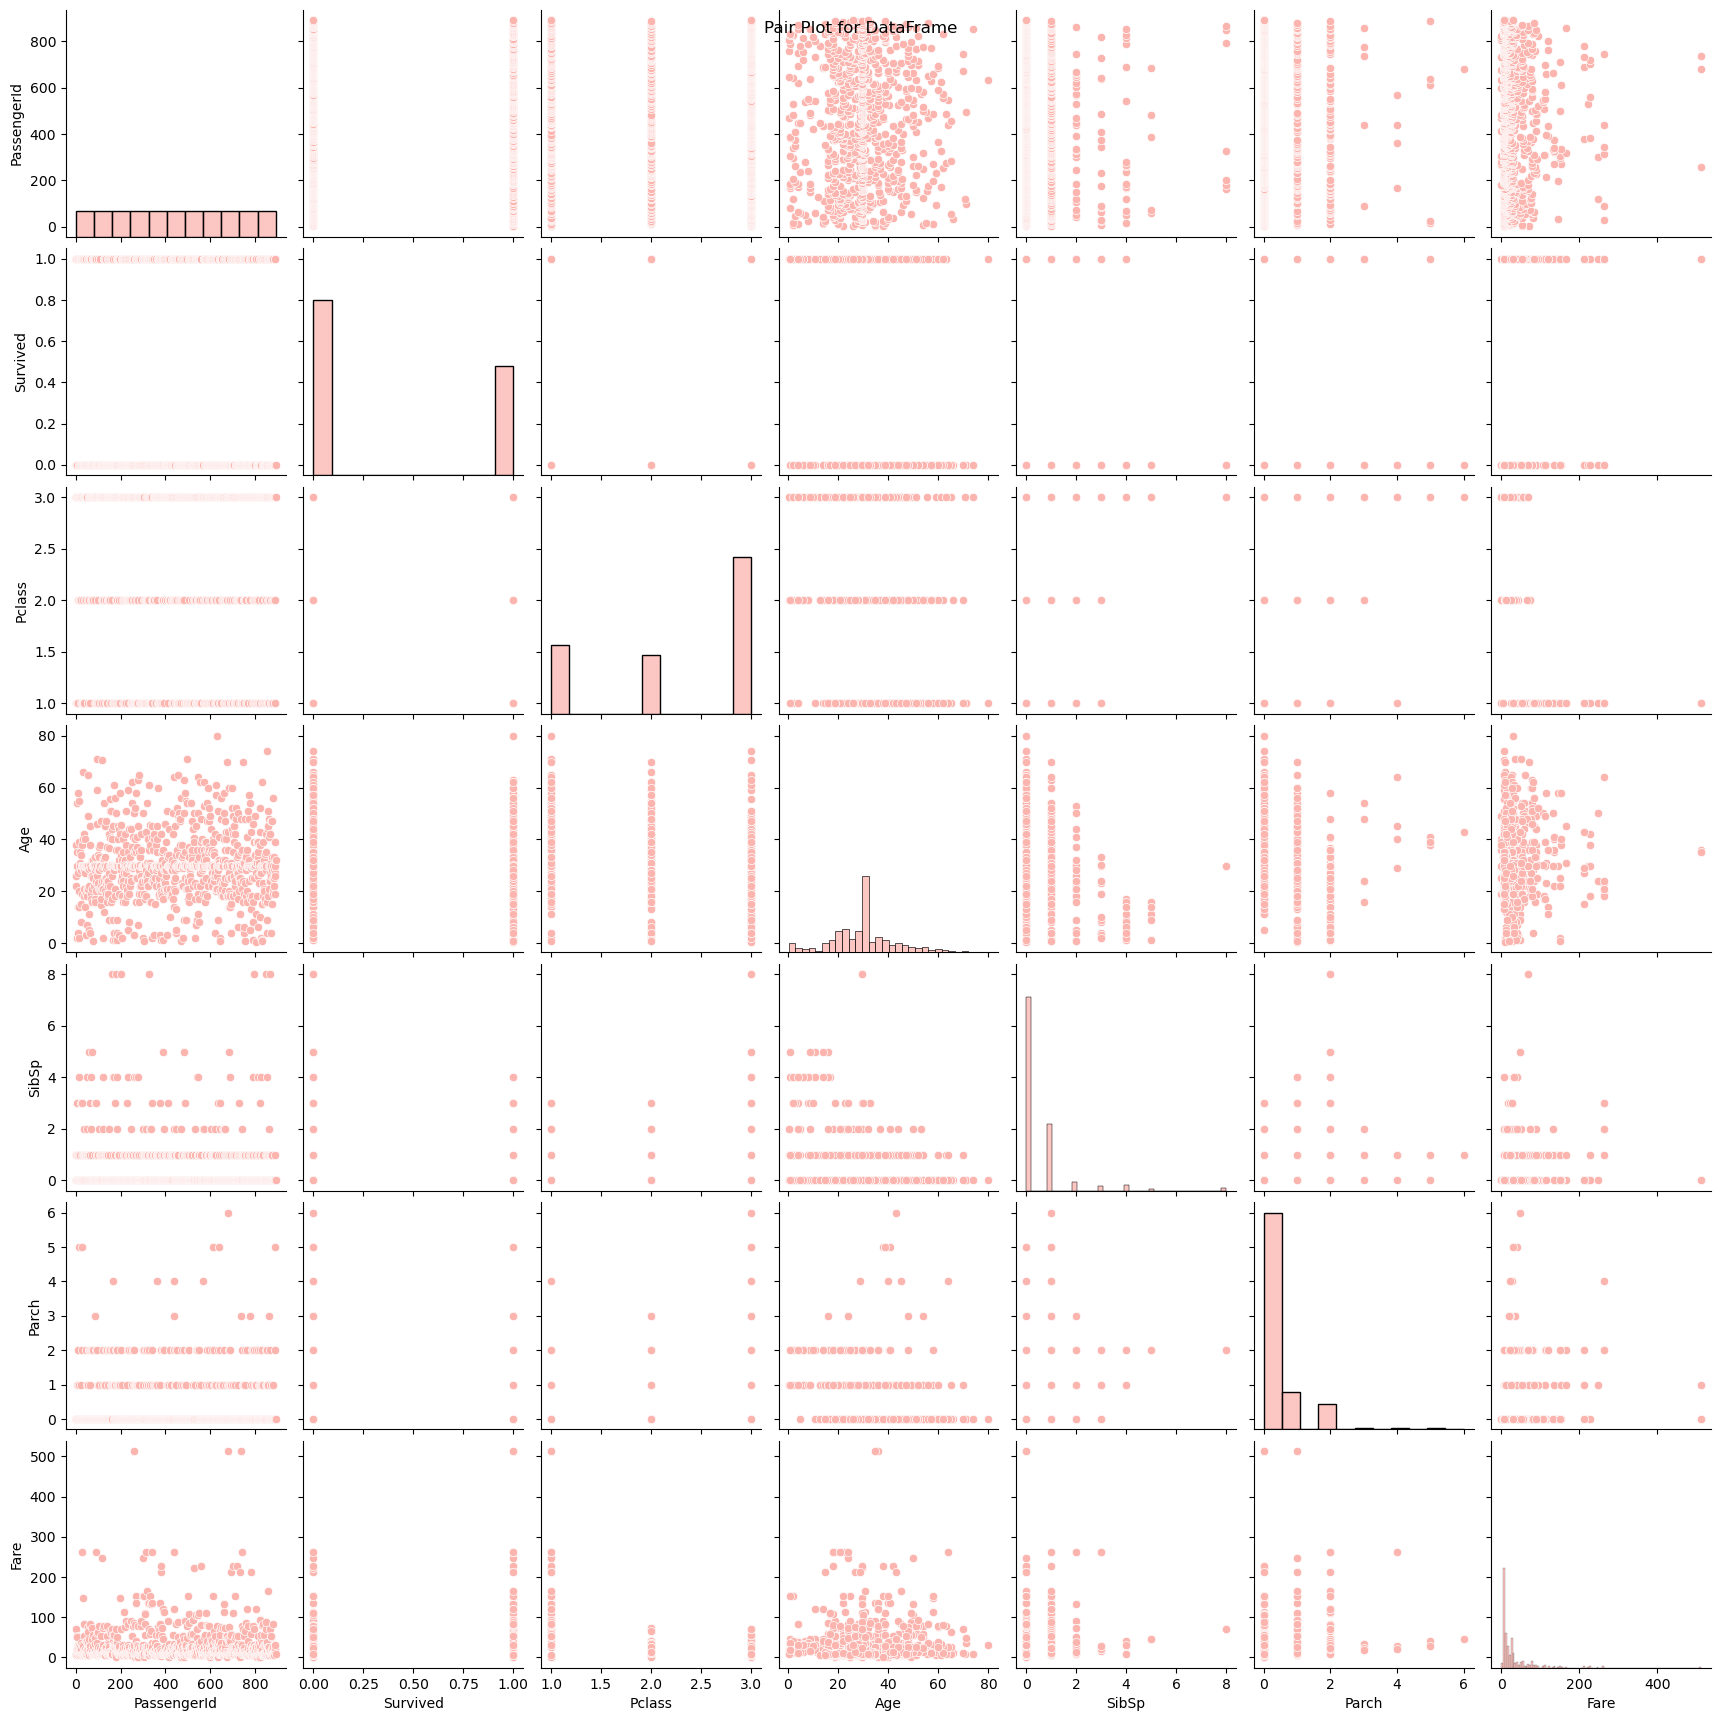

In [36]:
# Set the color palette
sns.set_palette("Pastel1")

# Assuming 'vdata' is your DataFrame
plt.figure(figsize=(10, 6))

# Using Seaborn to create a pair plot with the specified color palette
sns.pairplot(vdata)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

<h1 style="color:navy;">Multivariate Analysis</h1>

<h1 style="color:fuchsia;">Numerical Analaysis</h1>

In [27]:
vdata.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         3
dtype: int64

In [28]:
vdata.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,Not in Cabin,S


In [29]:
mvdata=vdata

In [30]:
mvdata = mvdata.drop('Name', axis=1)

<h1 style="color:orange;">Feature Encoding</h1>
<h1 style="color:navy;">Derived Metrics</h1>

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mvdata['Sex'] = le.fit_transform(mvdata['Sex'])
mvdata['Ticket'] = le.fit_transform(mvdata['Ticket'])
mvdata['Cabin'] = le.fit_transform(mvdata['Cabin'])
mvdata['Embarked'] = le.fit_transform(mvdata['Embarked'])
mvdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int32  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    int32  
 10  Embarked     891 non-null    int32  
dtypes: float64(2), int32(4), int64(5)
memory usage: 62.8 KB


In [32]:
mvdata.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,-0.035197,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,-0.253658,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.682176,0.157112
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.095991,0.104057
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.234912,-0.022239
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.043525,0.066654
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,-0.028179,0.038322
Ticket,-0.056554,-0.164549,0.319869,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,0.243082,-0.006041
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.502569,-0.221226
Cabin,-0.035197,-0.253658,0.682176,0.095991,-0.234912,0.043525,-0.028179,0.243082,-0.502569,1.000000,0.193283


In [37]:
mvdata.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Embarked      -0.163517
Ticket        -0.164549
Cabin         -0.253658
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

<Axes: >

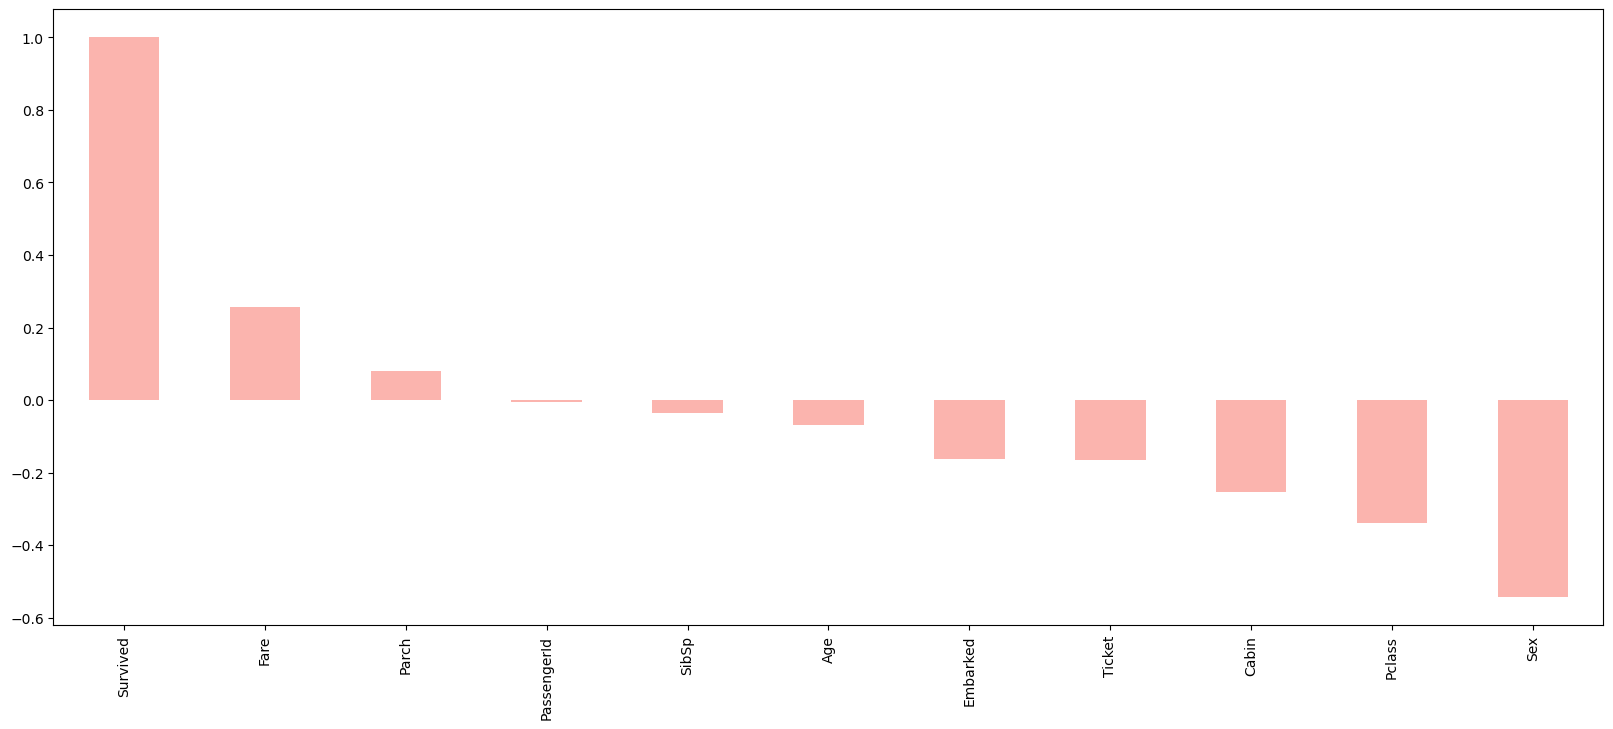

In [33]:
plt.figure(figsize=(20,8))
mvdata.corr()['Survived'].sort_values(ascending=False).plot(kind='bar')

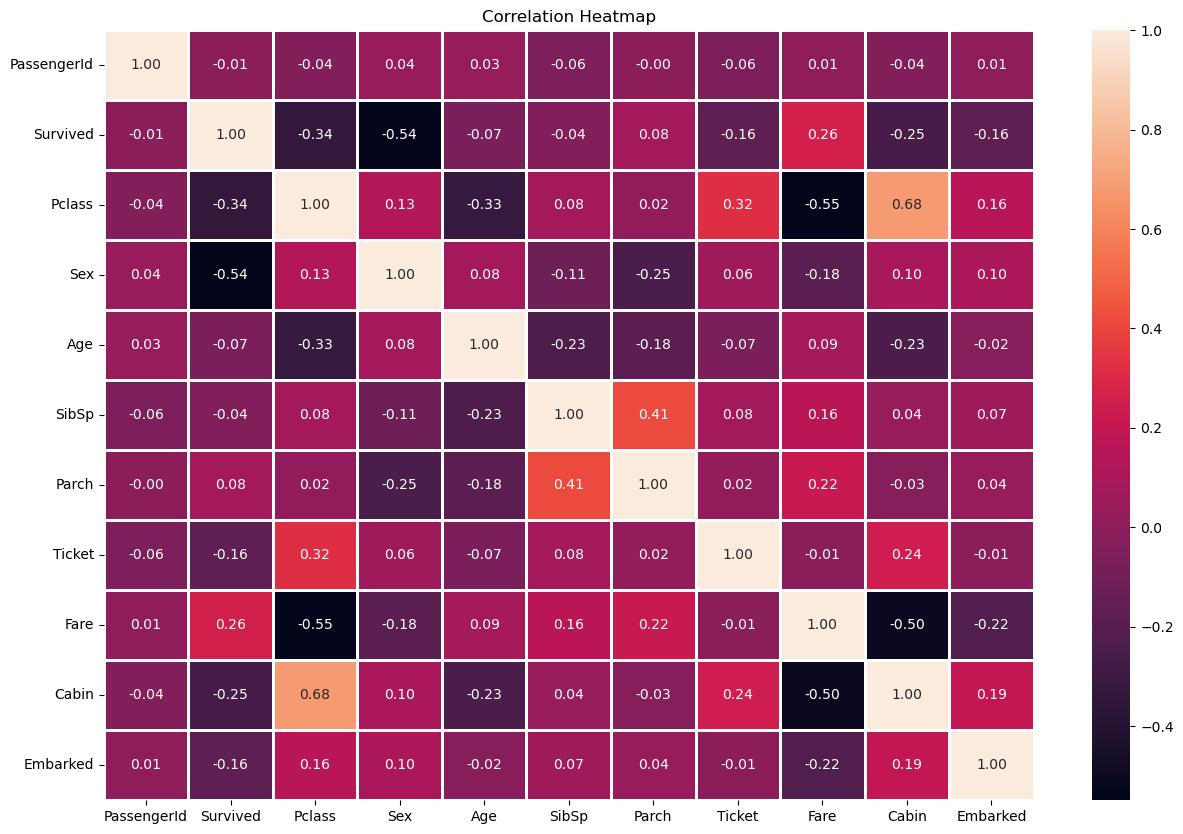

In [34]:
# Assuming 'mvdata' is your DataFrame
plt.figure(figsize=(15, 10))

# Using Seaborn to create a heatmap
sns.heatmap(mvdata.corr(), annot=True, fmt='.2f', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()


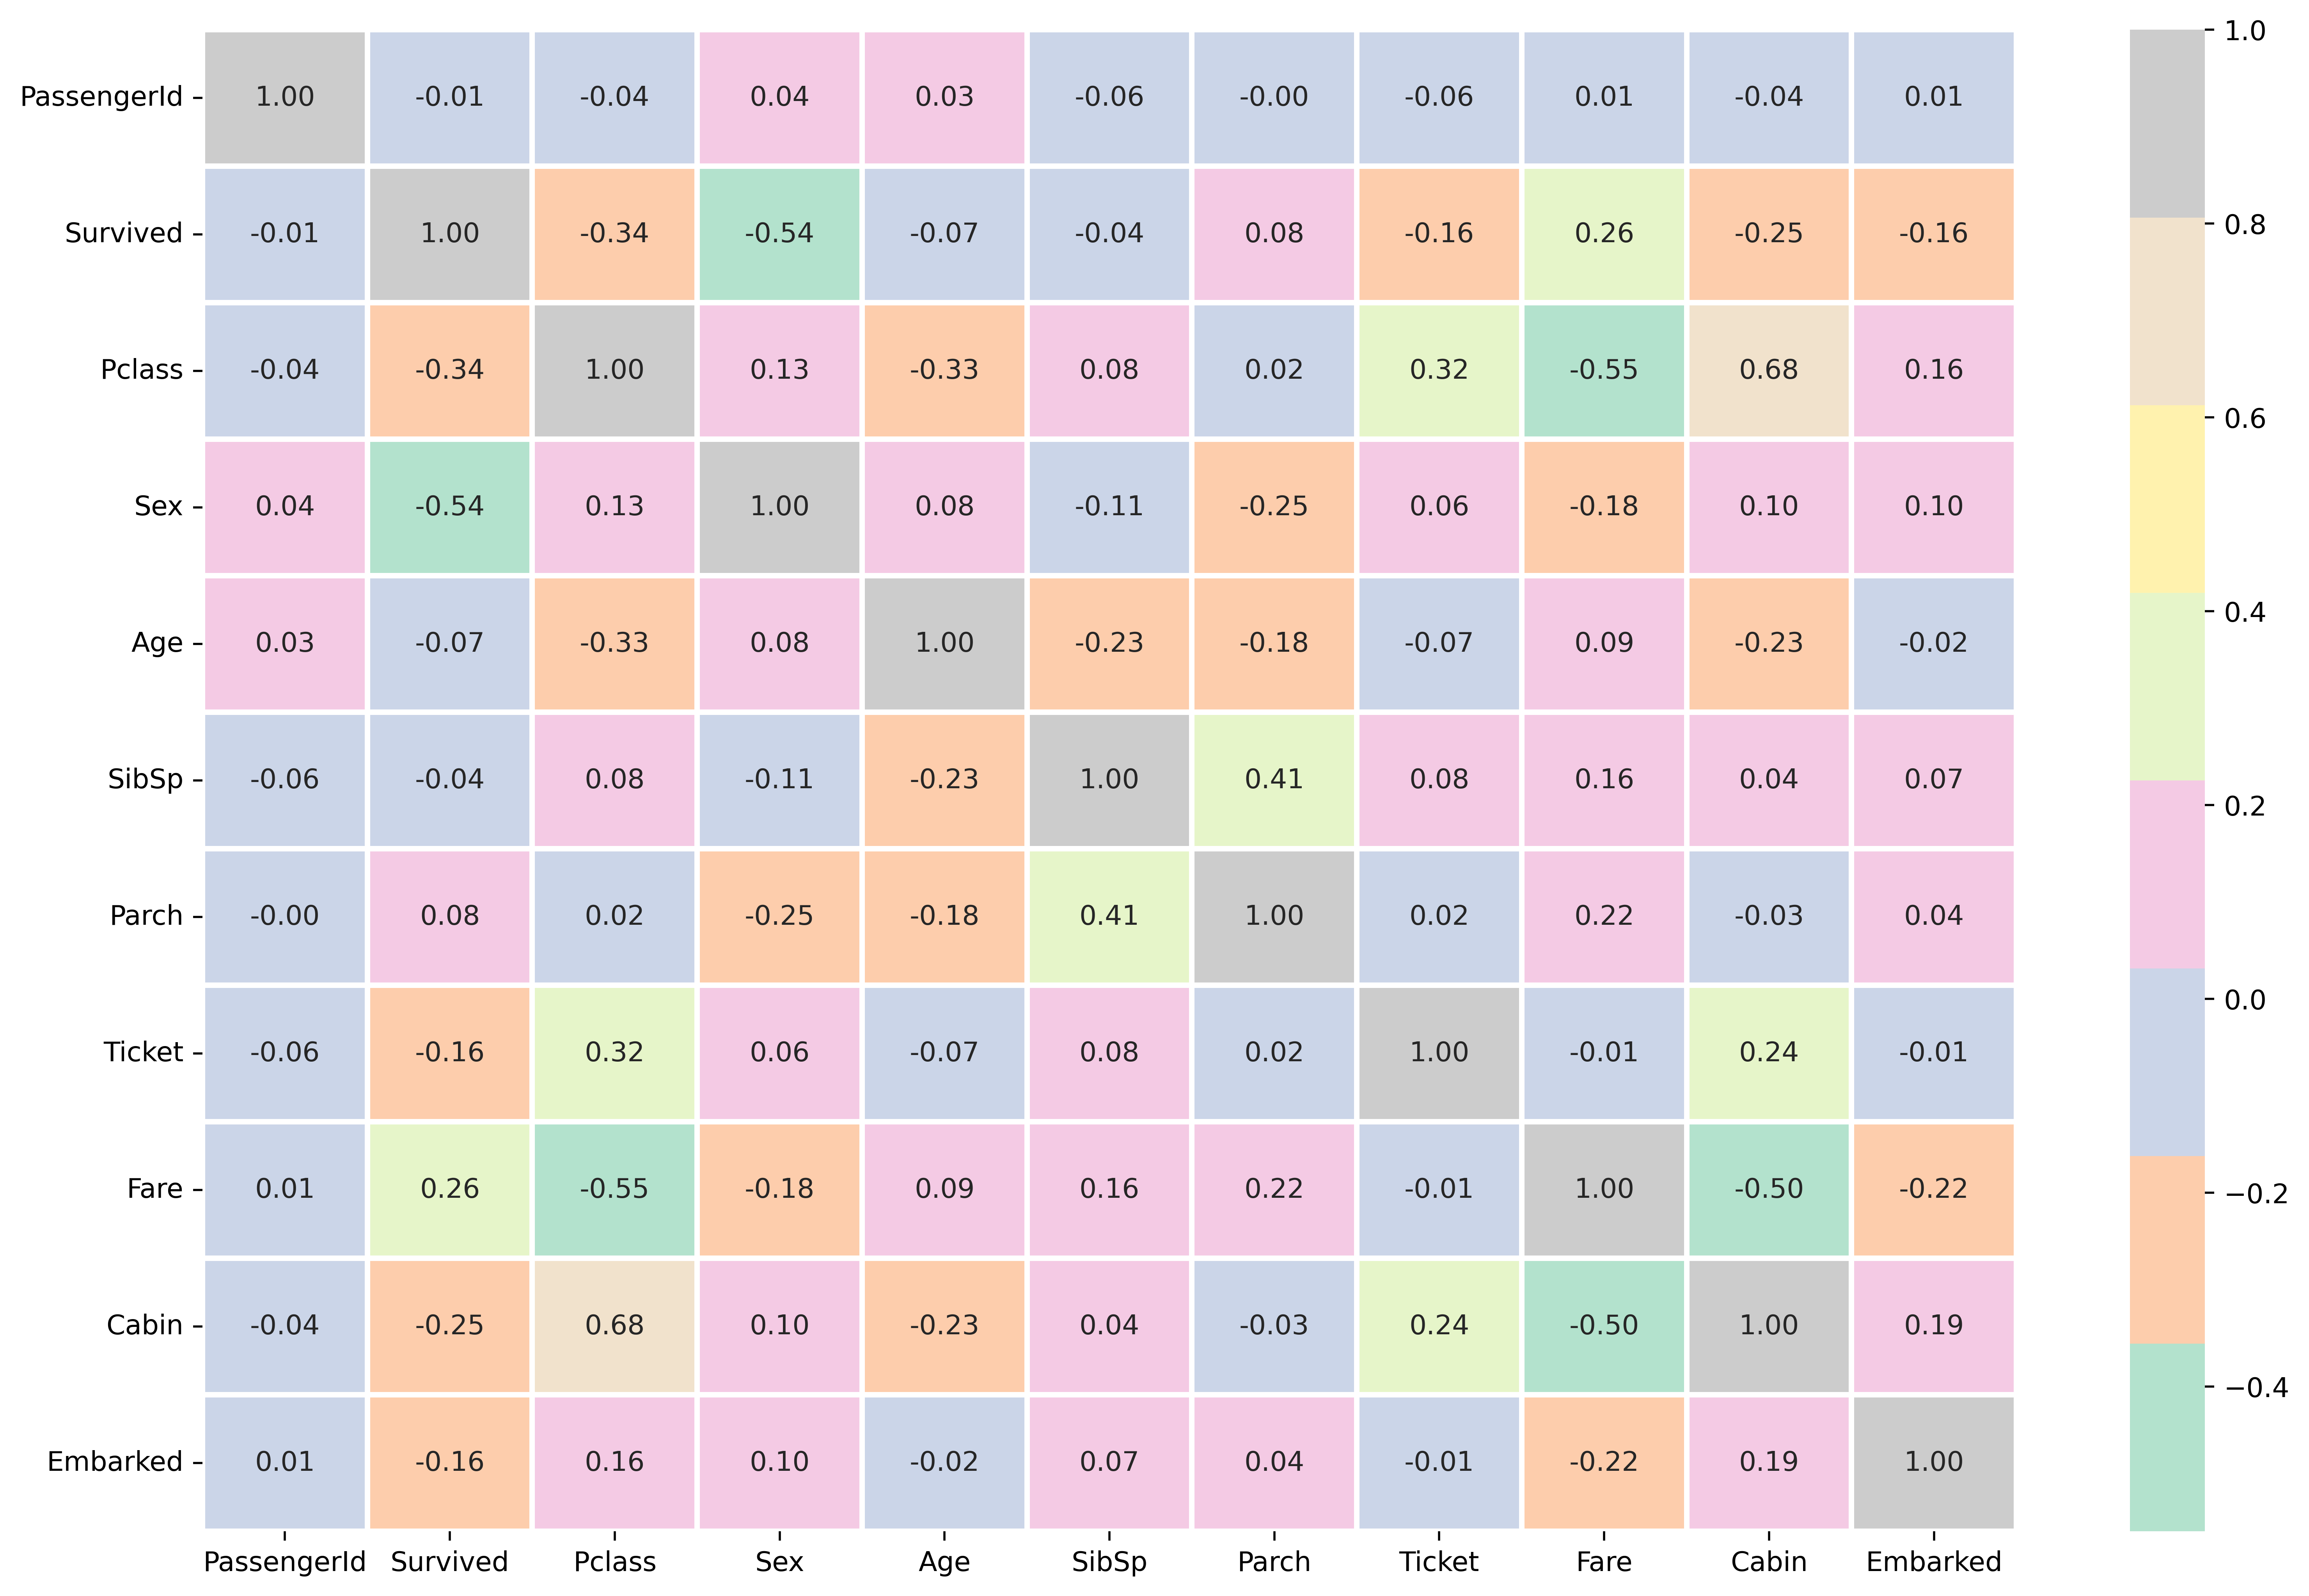

In [35]:
plt.figure(figsize=(15,10), dpi =500)
sns.heatmap(mvdata.corr(),annot=True,fmt=".2f",cmap='Pastel2', linewidth=2)
plt.show()